# 2_Filtros: Notch

El filtro notch (...)

In [8]:
import warnings
warnings.filterwarnings("always")
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,12)
from pandas import DataFrame
from IPython.display import HTML

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,12)
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
#------APERTURA DE LA SEÑAL-------
n = 10000

signals, fields = wfdb.io.rdsamp('101', pb_dir='mitdb',sampfrom = 0, sampto = n)

ecg_one_lead = signals[:,0]
fs = fields.get('fs')
nyq_frec = fs / 2

t = np.arange(0,n/fs,1/fs)


#------DISEÑO DEL FILTRO-------   
wo  = 60/nyq_frec
Q   = 100

b,a = sig.iirnotch(wo,Q)

/home/luciasucunza/.local/lib/python3.6/site-packages/wfdb/io/download.py:157: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sig_data = np.fromstring(response.content, dtype=dtype)


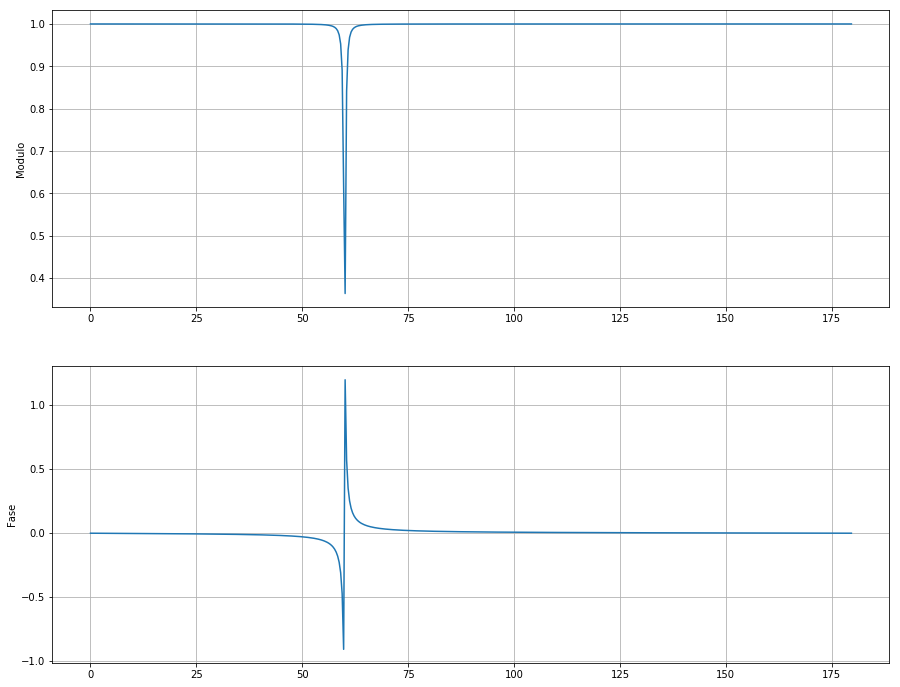

In [9]:
#------CALCULO Y PLOTEO DE LA RESPUESTA-------  
w,h = sig.freqz(b,a)

plt.figure(3)
plt.title('Respuesta del Filtro')
plt.subplot(211)
plt.plot(w*nyq_frec/np.pi,abs(h))
plt.grid()
plt.ylabel('Modulo')
plt.subplot(212)
plt.plot(w*nyq_frec/np.pi, np.arctan(h.imag/h.real))
plt.grid()
plt.ylabel('Fase')
plt.show()

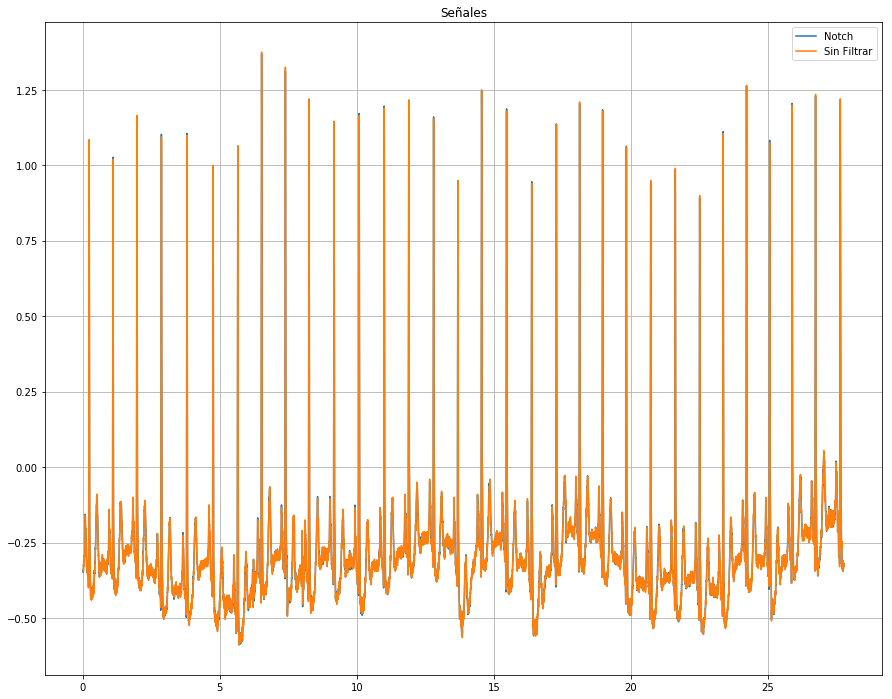

In [10]:
#------CALCULO Y PLOTEO DE LA SEÑAL FILTRADA-------  
ecg_f_notch = sig.lfilter(b,a,ecg_one_lead)

plt.figure(1)
plt.title('Señales')
plt.plot(t, ecg_f_notch,   label='Notch'      )
plt.plot(t, ecg_one_lead,  label='Sin Filtrar')
plt.grid()
plt.legend()
plt.show()

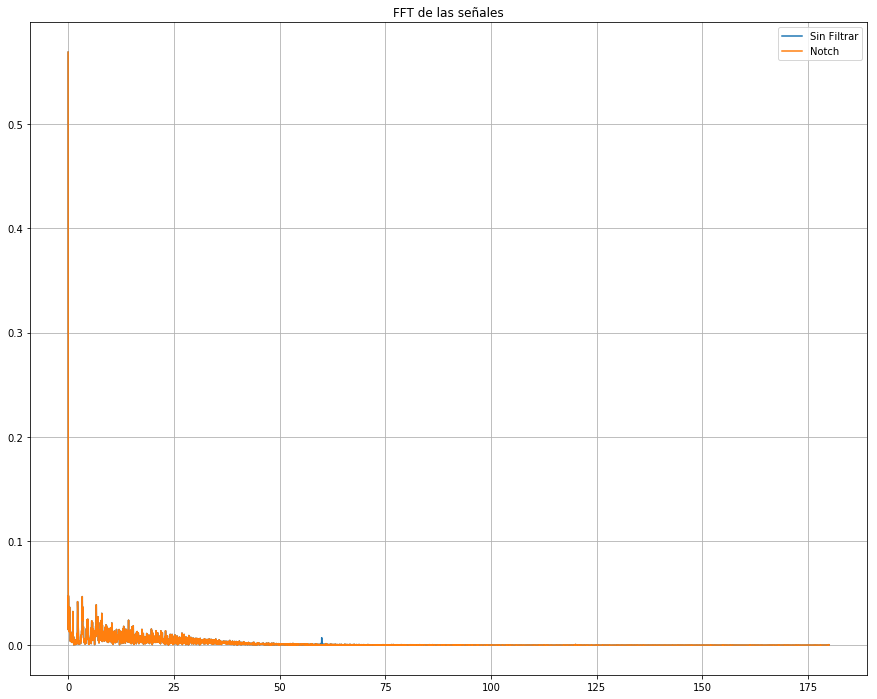

In [11]:
#------CALCULO Y PLOTEO DE LA FFT-------  
resf   = fs/n                                 
rangof = np.arange( 0, 360 , resf)         

FFT_ecg_one_lead = np.fft.fft( ecg_one_lead )
FFT_ecg_f_notch  = np.fft.fft( ecg_f_notch  )  

FFT_ecg_one_lead = abs( FFT_ecg_one_lead[range(n//2)]    ) / (n//2) 
FFT_ecg_f_notch  = abs( FFT_ecg_f_notch[range(n//2)]     ) / (n//2) 
rangof           = rangof[range(n//2)]     

plt.figure(2)
plt.title('FFT de las señales')
plt.plot(rangof, FFT_ecg_one_lead,  label='Sin Filtrar')
plt.plot(rangof, FFT_ecg_f_notch,   label='Notch')
plt.grid()
plt.legend()
plt.show()

Como se puede ver en la FFT se elimina perfectamente los 60Hz